In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
df= pd.read_csv('ETF_data_yfinance_formatado.csv')
df=df.set_index('Date')
df.index = pd.to_datetime(df.index)
display(df.head())
print("="*500)
display(df.tail())

/tmp/ipython-input-2-3615683906.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


,MSCI BRAZIL,MSCI USA,MSCI CHINA,MSCI INDIA,MSCI JAPAN,MSCI UK,MSCI CANADA,MSCI SOUTH AFRICA,MSCI RUSSIA,MSCI GERMANY,MSCI MEXICO,MSCI AUSTRALIA,MSCI FRANCE,MSCI SOUTH KOREA,MSCI SWITZERLAND,MSCI EM LATIN AMERICA,MSCI EM ASIA,MSCI EM EUROPE,MSCI WORLD,MSCI EUROPE
Date,,,,,,,,,,,,,,,,,,,,
NaT,EWZ,SPY,MCHI,INDA,EWJ,EWU,EWC,EZA,ERUS,EWG,EWW,EWA,EWQ,EWY,EWL,ILF,AAXJ,ESR,URTH,IEV
2016-01-04,12.360641479492188,171.34933471679688,36.29214859008789,23.988008499145508,40.473716735839844,21.900495529174805,17.327524185180664,29.382587432861328,11.363970756530762,20.050457000732422,38.56089401245117,12.590381622314453,18.305448532104492,41.06678009033203,24.904306411743164,13.112746238708496,43.53193283081055,0.25,57.60194778442383,30.122831344604492
2016-01-05,12.534207344055176,171.63919067382812,36.258453369140625,24.219690322875977,40.98259735107422,21.845327377319336,17.245746612548828,29.48567008972168,11.552149772644043,19.8621883392334,38.443023681640625,12.401860237121582,18.12869644165039,41.24456787109375,24.847503662109375,13.18887710571289,43.615901947021484,0.23999999463558197,57.198909759521484,29.93223762512207
2016-01-06,12.34824275970459,169.4740753173828,35.65176010131836,23.86325454711914,40.27015686035156,21.445384979248047,16.869600296020508,28.5902156829834,11.33260726928711,19.63469696044922,37.65718078613281,12.04502010345459,17.84435272216797,40.423397064208984,24.47422218322754,12.903402328491211,42.76792526245117,0.25,56.53557586669922,29.429046630859375
2016-01-07,11.88952350616455,165.4081268310547,34.194000244140625,23.105833053588867,39.65949249267578,20.852359771728516,16.468915939331055,27.147165298461914,10.914430618286133,19.242475509643555,36.18767547607422,11.533327102661133,17.598434448242188,39.78001403808594,24.076597213745117,12.389549255371094,41.57572555541992,0.25,54.70507049560547,28.89535903930664


,MSCI BRAZIL,MSCI USA,MSCI CHINA,MSCI INDIA,MSCI JAPAN,MSCI UK,MSCI CANADA,MSCI SOUTH AFRICA,MSCI RUSSIA,MSCI GERMANY,MSCI MEXICO,MSCI AUSTRALIA,MSCI FRANCE,MSCI SOUTH KOREA,MSCI SWITZERLAND,MSCI EM LATIN AMERICA,MSCI EM ASIA,MSCI EM EUROPE,MSCI WORLD,MSCI EUROPE
Date,,,,,,,,,,,,,,,,,,,,
2025-06-27,28.139999389648438,614.9099731445312,55.18000030517578,55.86000061035156,75.27999877929688,39.720001220703125,45.58000183105469,52.63999938964844,8.0600004196167,42.29999923706055,60.31999969482422,26.09000015258789,42.61000061035156,70.73999786376953,54.630001068115234,25.770000457763672,82.6500015258789,NaN,168.58999633789062,63.150001525878906
2025-06-30,28.850000381469727,617.8499755859375,55.099998474121094,55.68000030517578,74.97000122070312,39.720001220703125,46.20000076293945,53.75,8.0600004196167,42.310001373291016,60.560001373291016,26.31999969482422,42.79999923706055,71.77999877929688,54.810001373291016,26.209999084472656,82.62000274658203,NaN,169.3800048828125,63.25
2025-07-01,28.790000915527344,617.6500244140625,55.27000045776367,55.84000015258789,74.41999816894531,39.849998474121094,46.189998626708984,54.209999084472656,8.0600004196167,42.0099983215332,61.119998931884766,26.350000381469727,42.869998931884766,71.63999938964844,54.97999954223633,26.280000686645508,82.79000091552734,NaN,169.14999389648438,63.22999954223633
2025-07-02,28.90999984741211,620.4500122070312,55.0,55.599998474121094,74.45999908447266,39.61000061035156,46.33000183105469,54.310001373291016,8.0600004196167,42.16999816894531,61.59000015258789,26.540000915527344,43.27000045776367,71.94999694824219,55.27000045776367,26.510000228881836,83.05999755859375,NaN,169.8699951171875,63.5
2025-07-03,29.309999465942383,625.3400268554688,54.720001220703125,55.790000915527344,74.5999984741211,39.81999969482422,46.66999816894531,54.790000915527344,8.0600004196167,42.209999084472656,61.70000076293945,26.479999542236328,43.08000183105469,72.69999694824219,54.900001525878906,26.639999389648438,83.37000274658203,NaN,170.8699951171875,63.40999984741211


# Regressão de séries históricas para os países do Brics



<Axes: title={'center': 'ETF Prices Over Time'}, xlabel='Date'>

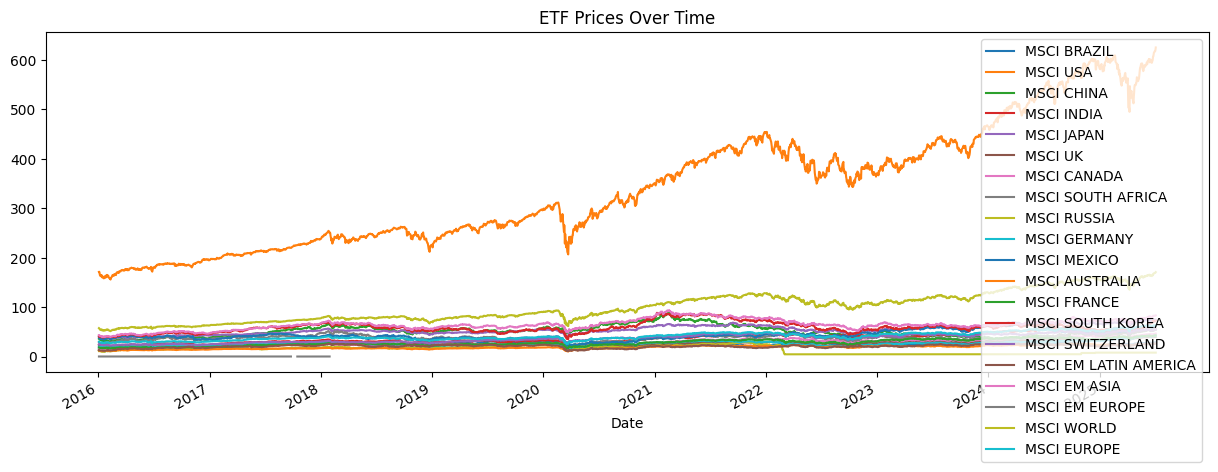

In [3]:
df= df.apply(pd.to_numeric, errors='coerce')
df.plot(figsize=(15, 5), title='ETF Prices Over Time')



In [4]:
df.tail()

,MSCI BRAZIL,MSCI USA,MSCI CHINA,MSCI INDIA,MSCI JAPAN,MSCI UK,MSCI CANADA,MSCI SOUTH AFRICA,MSCI RUSSIA,MSCI GERMANY,MSCI MEXICO,MSCI AUSTRALIA,MSCI FRANCE,MSCI SOUTH KOREA,MSCI SWITZERLAND,MSCI EM LATIN AMERICA,MSCI EM ASIA,MSCI EM EUROPE,MSCI WORLD,MSCI EUROPE
Date,,,,,,,,,,,,,,,,,,,,
2025-06-27,28.139999,614.909973,55.180000,55.860001,75.279999,39.720001,45.580002,52.639999,8.06,42.299999,60.320000,26.090000,42.610001,70.739998,54.630001,25.770000,82.650002,NaN,168.589996,63.150002
2025-06-30,28.850000,617.849976,55.099998,55.680000,74.970001,39.720001,46.200001,53.750000,8.06,42.310001,60.560001,26.320000,42.799999,71.779999,54.810001,26.209999,82.620003,NaN,169.380005,63.250000
2025-07-01,28.790001,617.650024,55.270000,55.840000,74.419998,39.849998,46.189999,54.209999,8.06,42.009998,61.119999,26.350000,42.869999,71.639999,54.980000,26.280001,82.790001,NaN,169.149994,63.230000
2025-07-02,28.910000,620.450012,55.000000,55.599998,74.459999,39.610001,46.330002,54.310001,8.06,42.169998,61.590000,26.540001,43.270000,71.949997,55.270000,26.510000,83.059998,NaN,169.869995,63.500000
2025-07-03,29.309999,625.340027,54.720001,55.790001,74.599998,39.820000,46.669998,54.790001,8.06,42.209999,61.700001,26.480000,43.080002,72.699997,54.900002,26.639999,83.370003,NaN,170.869995,63.410000


In [5]:
brics = ['MSCI SOUTH AFRICA', 'MSCI BRAZIL', 'MSCI INDIA', 'MSCI CHINA']
# Cria uma cópia explícita para evitar o SettingWithCopyWarning
df_brics = df[brics].copy()
# Remove as linhas com valores ausentes
df_brics.dropna(inplace=True)

<Axes: title={'center': 'BRICS ETFs'}, xlabel='Date'>

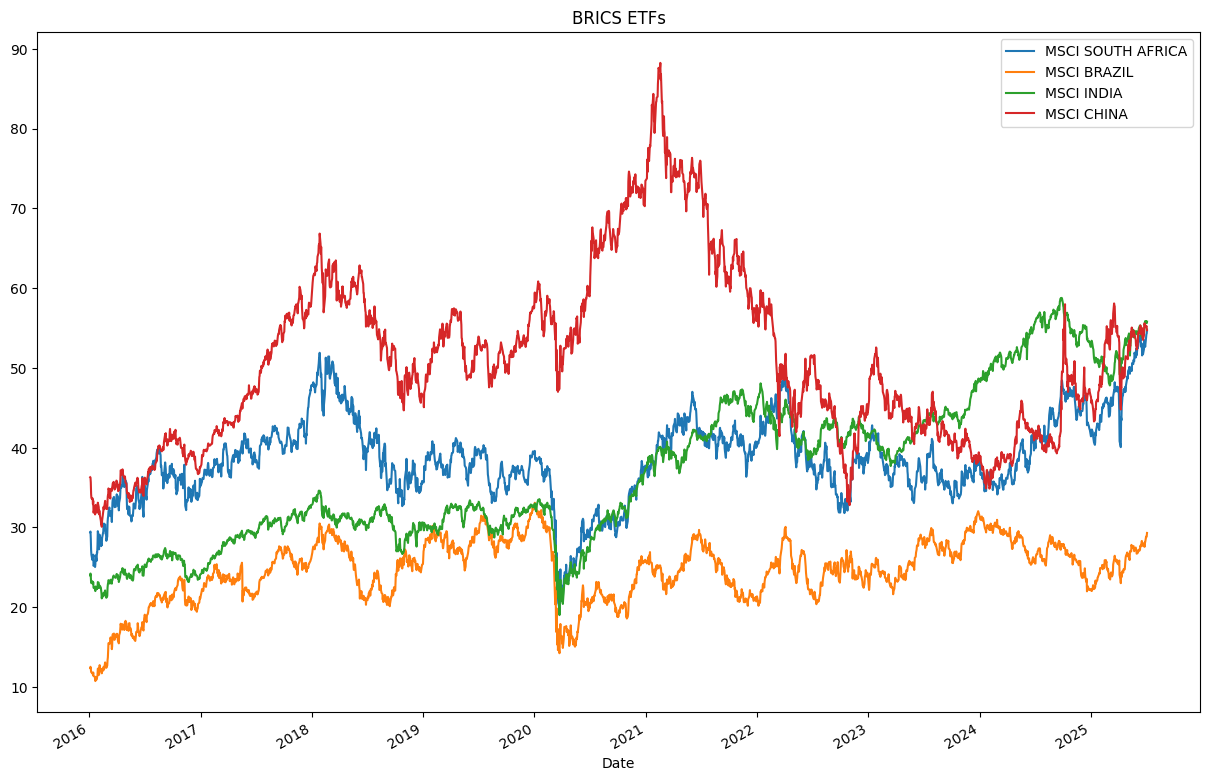

In [6]:
df_brics.dropna(inplace=True)
df_brics.plot(figsize=(15, 10), title='BRICS ETFs')

# Seção 1: Decomposição das séries e procura por features relevantes

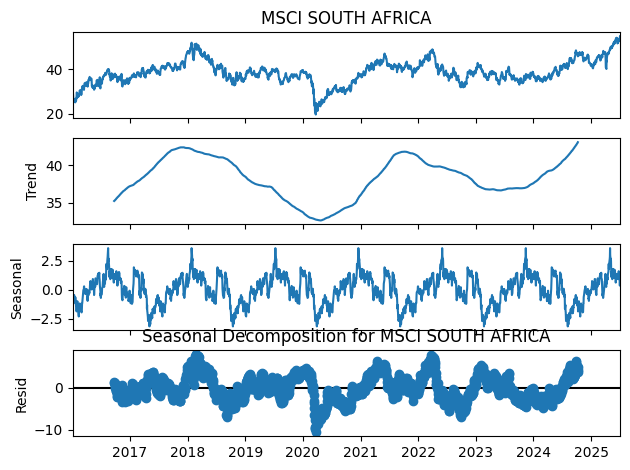

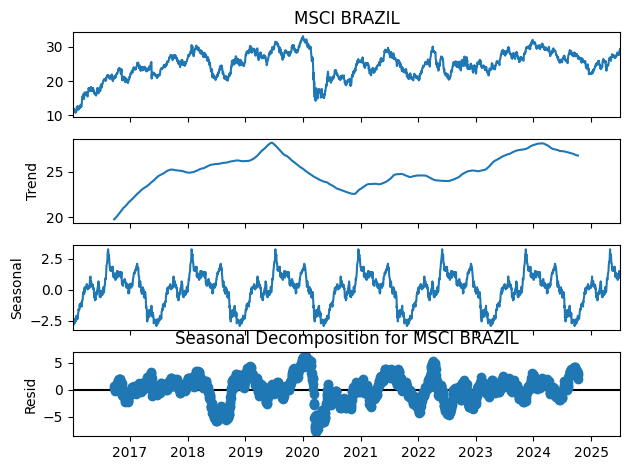

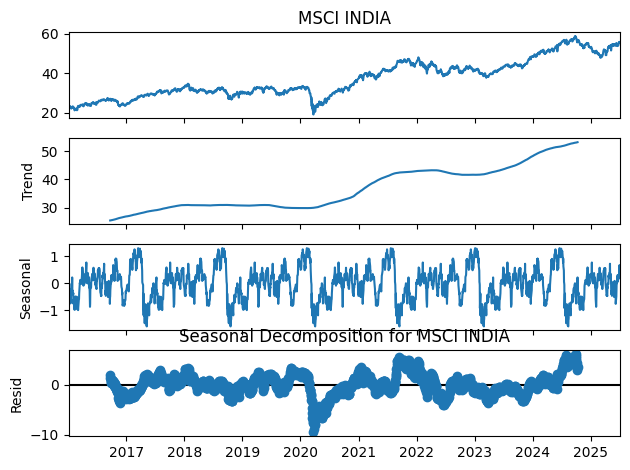

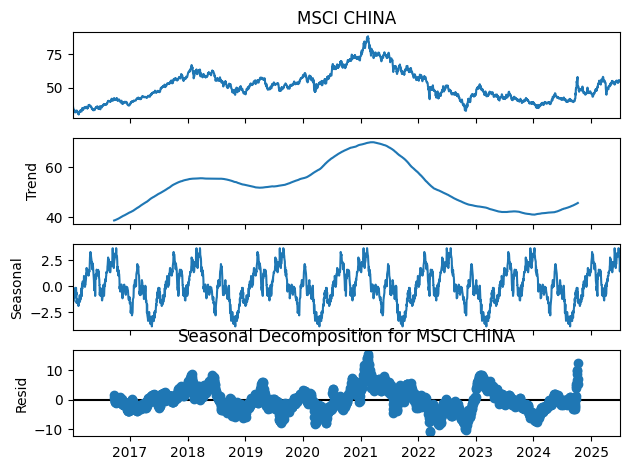

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
for country in df_brics.columns:
    result = seasonal_decompose(df_brics[country], model='additive', period=365)
    result.plot()
    plt.title(f'Seasonal Decomposition for {country}')
    plt.show()


In [8]:
india_series = df_brics['MSCI INDIA'].dropna()

# Dividindo os dados em treino (80%) e teste (20%)
train_size = int(len(india_series) * 0.8)
train, test = india_series[0:train_size], india_series[train_size:len(india_series)]

print(f'Observações de treino: {len(train)}')
print(f'Observações de teste: {len(test)}')

Observações de treino: 1911
Observações de teste: 478


In [9]:
history = [x for x in train]
predictions = list()

# O loop percorre o conjunto de teste, treinando o modelo a cada passo
for t in range(len(test)):
    # O modelo ARIMA(5,1,0) é uma configuração comum para dados financeiros
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Previsto={yhat}, Esperado={obs}')

# Avaliando o erro
error = mean_squared_error(test, predictions)
print(f'\nMean Squared Error do Teste: {error:.3f}')

/tmp/ipython-input-9-3454923128.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test[t]


Previsto=43.83519979335886, Esperado=43.61446380615234
Previsto=43.62143839450798, Esperado=43.6243896484375
Previsto=43.61595634981905, Esperado=43.55489349365234
Previsto=43.58961935247177, Esperado=43.30669021606445
Previsto=43.346646876454834, Esperado=43.15776824951172
Previsto=43.15561358749755, Esperado=42.91949081420898
Previsto=42.94634112389108, Esperado=43.04855728149414
Previsto=43.00860868136272, Esperado=42.88970565795898
Previsto=42.899971043069655, Esperado=43.018775939941406
Previsto=42.981329905525236, Esperado=43.28683090209961
Previsto=43.23769788368505, Esperado=43.19747924804688
Previsto=43.2282682196094, Esperado=43.87259292602539
Previsto=43.76132163858687, Esperado=43.45561218261719
Previsto=43.559079344499054, Esperado=43.445682525634766
Previsto=43.45210715090947, Esperado=43.564823150634766
Previsto=43.547229018684746, Esperado=43.87259292602539
Previsto=43.85990571899411, Esperado=43.813026428222656
Previsto=43.81292964077927, Esperado=43.654178619384766
Pr

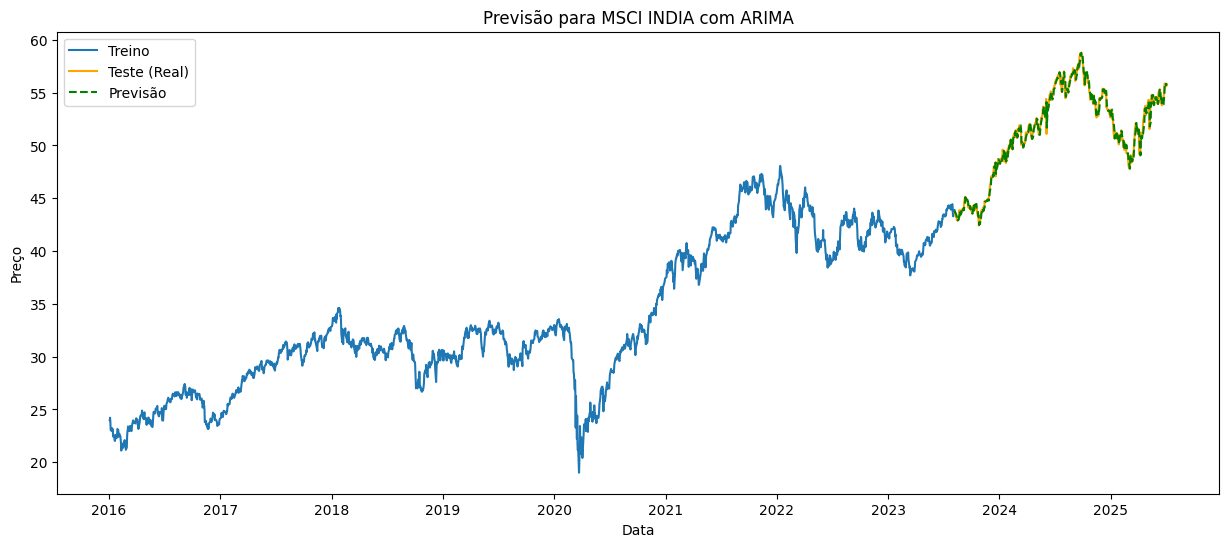

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(train.index, train, label='Treino')
plt.plot(test.index, test, label='Teste (Real)', color='orange')
plt.plot(test.index, predictions, label='Previsão', color='green', linestyle='--')
plt.title('Previsão para MSCI INDIA com ARIMA')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

-------------------------------------------------------------

In [11]:
df_brasil=pd.read_csv('df_MSCI_BRAZIL.csv')

df_brasil.head()

,Date,mes,semestre,quadrimestre,covid,trump,guerra_ucrania,MSCI BRAZIL
0,2016-01-04,1,1,1,0,0,0,12.360641
1,2016-01-05,1,1,1,0,0,0,12.534207
2,2016-01-06,1,1,1,0,0,0,12.348243
3,2016-01-07,1,1,1,0,0,0,11.889524
4,2016-01-08,1,1,1,0,0,0,11.833734


In [12]:
df_china=pd.read_csv('df_MSCI_CHINA.csv')
df_india=pd.read_csv('df_MSCI_INDIA.csv')
df_south_africa=pd.read_csv('df_MSCI_SOUTH_AFRICA.csv')

**Design de features extras fora dos dataframes originais para dar mais poder explanatório**

In [13]:
def design_features():
    """
    Adiciona colunas para registrar a média e variância móveis (volatilidade) com uma janela de 5 dias.
    Adiciona também uma coluna para mostrar a diferença entre o valor da coluna alvo vs o primeiro dia registrado do dataframe.
    Retorna o primeiro DataFrame (df_brasil) como exemplo, após processamento.
    """
    dataframes = [df_brasil, df_india, df_china, df_south_africa]

    for df in dataframes:

        msci_col = None
        for col in df.columns:
            if 'MSCI' in col:
                msci_col = col
                break

        if msci_col:


            df['volatilidade'] = df[msci_col].rolling(window=5).std()
            df['diferenca'] = df[msci_col] - df[msci_col].iloc[0]  # Corrigido: usa msci_col

            # Remove linhas com NaN
            df.dropna( inplace=True)
        else:
            print(f"AVISO: Nenhuma coluna contendo 'MSCI' encontrada em {df.columns}")

    return df_brasil.head()

if __name__ == "__main__":
    print(design_features())

         Date  mes  semestre  quadrimestre  covid  trump  guerra_ucrania  \
4  2016-01-08    1         1             1      0      0               0   
5  2016-01-11    1         1             1      0      0               0   
6  2016-01-12    1         1             1      0      0               0   
7  2016-01-13    1         1             1      0      0               0   
8  2016-01-14    1         1             1      0      0               0   

   MSCI BRAZIL  volatilidade  diferenca  
4    11.833734      0.312168  -0.526908  
5    11.734548      0.351358  -0.626094  
6    11.790339      0.246457  -0.570302  
7    11.517586      0.143450  -0.843056  
8    11.808935      0.127990  -0.551706  


In [14]:
df_brasil.head(20)

,Date,mes,semestre,quadrimestre,covid,trump,guerra_ucrania,MSCI BRAZIL,volatilidade,diferenca
4,2016-01-08,1,1,1,0,0,0,11.833734,0.312168,-0.526908
5,2016-01-11,1,1,1,0,0,0,11.734548,0.351358,-0.626094
6,2016-01-12,1,1,1,0,0,0,11.790339,0.246457,-0.570302
7,2016-01-13,1,1,1,0,0,0,11.517586,0.143450,-0.843056
8,2016-01-14,1,1,1,0,0,0,11.808935,0.127990,-0.551706
9,2016-01-15,1,1,1,0,0,0,11.368816,0.192694,-0.991825
10,2016-01-19,1,1,1,0,0,0,11.300625,0.234847,-1.060017
11,2016-01-20,1,1,1,0,0,0,11.027876,0.287343,-1.332766
12,2016-01-21,1,1,1,0,0,0,10.742723,0.398672,-1.617919
13,2016-01-22,1,1,1,0,0,0,11.207643,0.251290,-1.152999


Bibliotecas necessárias com Random Search

In [15]:
import joblib
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from scipy.stats import randint, uniform
from scipy.stats import loguniform

# Configurações globais
TEST_SIZE = 0.2
N_SPLITS = 7


Grid de parâmetros a serem explorados

In [16]:
param_distributions = {
    'RandomForest': {
        'model__n_estimators': randint(20, 300),
        'model__max_depth': [None, 10, 20, 30, 50],
        'model__min_samples_split': randint(2, 25),
        'model__max_features': ['sqrt', 'log2', 0.8],
        'model__bootstrap': [True, False]
    },
    'GradientBoosting': {
        'model__n_estimators': randint(20, 300),
        'model__learning_rate': loguniform(1e-3, 0.3),
        'model__max_depth': randint(3, 20),
        'model__min_samples_split': randint(2, 20),
        'model__subsample': uniform(0.6, 0.4)
    },
    'XGBoost': {
        'model__n_estimators': randint(20, 300),
        'model__learning_rate': loguniform(1e-3, 0.3),
        'model__max_depth': randint(3, 15),
        'model__subsample': uniform(0.6, 0.4),
        'model__colsample_bytree': uniform(0.7, 0.3),
        'model__gamma': uniform(0, 0.5),
        'model__reg_alpha': loguniform(1e-6, 10),
        'model__reg_lambda': loguniform(1e-6, 10)
    }
}

Intervalos de Confiança

In [17]:
def calculate_confidence_intervals(model, X_test, model_name):
    """Calcula intervalos de confiança específicos para cada tipo de modelo"""
    if model_name == 'RandomForest':
        # Método de percentis das árvores
        preds = np.array([tree.predict(X_test) for tree in model.named_steps['model'].estimators_])
        lower = np.percentile(preds, 2.5, axis=0)
        upper = np.percentile(preds, 97.5, axis=0)

    elif model_name == 'GradientBoosting':
        # Método de desvio padrão por estágio
        preds = np.array([est.predict(X_test) for est in model.named_steps['model'].estimators_])
        cumulative = np.cumsum(preds, axis=0)
        std_per_stage = np.std(cumulative, axis=0)
        lower = model.predict(X_test) - 1.96 * std_per_stage[-1]
        upper = model.predict(X_test) + 1.96 * std_per_stage[-1]

    elif model_name == 'XGBoost':
        # Método de quantis
        model.named_steps['model'].set_params(objective='reg:quantileerror')
        lower = model.predict(X_test, iteration_range=(0, model.best_iteration), quantile=0.025)
        upper = model.predict(X_test, iteration_range=(0, model.best_iteration), quantile=0.975)
        model.named_steps['model'].set_params(objective='reg:squarederror')  # Volta ao padrão

    return lower, upper

In [18]:
def calculate_confidence_intervals(model, X_test, model_name, y_test=None):
    """Calcula intervalos de confiança específicos para cada tipo de modelo"""
    y_pred = model.predict(X_test)

    if model_name == 'RandomForest':
        preds = np.array([tree.predict(X_test) for tree in model.named_steps['model'].estimators_])
        lower = np.percentile(preds, 2.5, axis=0)
        upper = np.percentile(preds, 97.5, axis=0)
    else:
        std = np.std(y_pred - y_test) if y_test is not None else np.std(y_pred)
        lower = y_pred - 1.96 * std
        upper = y_pred + 1.96 * std

    return y_pred, lower, upper

In [19]:
# Dicionário para armazenar os modelos treinados
saved_models = {}


dataframes = {
    'Brasil': df_brasil,
    'India': df_india,
    'China': df_china,
    'Africa_do_Sul': df_south_africa
}

# Dicionário para armazenar conjuntos de treino/teste
train_test_sets = {}

for country, df in dataframes.items():
    print(f"\nPreparando dados para {country}...")

    # Garante que a data está no índice (isso tava dando problema)
    if not isinstance(df.index, pd.DatetimeIndex):
        df = df.set_index(pd.to_datetime(df.index))


    msci_cols = [col for col in df.columns if 'msci' in col.lower().replace(' ', '')]
    if not msci_cols:
        raise ValueError(f"Coluna MSCI não encontrada em {country}")

    target_col = msci_cols[0]
    print(f"Usando coluna alvo: '{target_col}'")


    X = df.drop(columns=[target_col])


    non_numeric = X.select_dtypes(exclude=['number']).columns
    if len(non_numeric) > 0:
        print(f"Aviso: Removendo colunas não numéricas: {list(non_numeric)}")
        X = X.select_dtypes(include=['number'])

    y = df[target_col]


    split_idx = int(len(df) * (1 - TEST_SIZE))
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    train_test_sets[country] = (X_train, X_test, y_train, y_test)
    print(f"  Treino: {len(X_train)} amostras | Teste: {len(X_test)} amostras")
    print(f"  Features usadas: {list(X_train.columns)}")


Preparando dados para Brasil...
Usando coluna alvo: 'MSCI BRAZIL'
Aviso: Removendo colunas não numéricas: ['Date']
  Treino: 1908 amostras | Teste: 477 amostras
  Features usadas: ['mes', 'semestre', 'quadrimestre', 'covid', 'trump', 'guerra_ucrania', 'volatilidade', 'diferenca']

Preparando dados para India...
Usando coluna alvo: 'MSCI INDIA'
Aviso: Removendo colunas não numéricas: ['Date']
  Treino: 1908 amostras | Teste: 477 amostras
  Features usadas: ['mes', 'semestre', 'quadrimestre', 'covid', 'trump', 'guerra_ucrania', 'volatilidade', 'diferenca']

Preparando dados para China...
Usando coluna alvo: 'MSCI CHINA'
Aviso: Removendo colunas não numéricas: ['Date']
  Treino: 1908 amostras | Teste: 477 amostras
  Features usadas: ['mes', 'semestre', 'quadrimestre', 'covid', 'trump', 'guerra_ucrania', 'volatilidade', 'diferenca']

Preparando dados para Africa_do_Sul...
Usando coluna alvo: 'MSCI SOUTH AFRICA'
Aviso: Removendo colunas não numéricas: ['Date']
  Treino: 1908 amostras | Tes

# Seção 2: Treinamento de modelos por país

Treinamento dos modelos

In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}


In [21]:
search_results = {}

for country in dataframes.keys():
    print(f"\n=== Ajustando hiperparâmetros para {country.upper()} ===")
    X_train, X_test, y_train, y_test = train_test_sets[country]

    for model_name, base_model in models.items():
        print(f"\n--- {model_name} ---")

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', base_model)
        ])

        tscv = TimeSeriesSplit(n_splits=N_SPLITS)
        search = RandomizedSearchCV(
            pipeline,
            param_distributions=param_distributions[model_name],
            n_iter=200,
            cv=tscv,
            scoring='neg_mean_squared_error',
            random_state=666,
            n_jobs=-1
        )
        search.fit(X_train, y_train)

        # Remove prefixos "model__"
        best_params = search.best_params_
        clean_params = {k.split("model__")[-1]: v for k, v in best_params.items()}
        search_results[(country, model_name)] = clean_params

        print(f"📌 Melhores parâmetros para {model_name} em {country}: {clean_params}")



=== Ajustando hiperparâmetros para BRASIL ===

--- RandomForest ---
📌 Melhores parâmetros para RandomForest em Brasil: {'bootstrap': False, 'max_depth': 50, 'max_features': 0.8, 'min_samples_split': 6, 'n_estimators': 79}

--- GradientBoosting ---
📌 Melhores parâmetros para GradientBoosting em Brasil: {'learning_rate': np.float64(0.2380601371344172), 'max_depth': 12, 'min_samples_split': 8, 'n_estimators': 153, 'subsample': np.float64(0.601563937547111)}

--- XGBoost ---
📌 Melhores parâmetros para XGBoost em Brasil: {'colsample_bytree': np.float64(0.759810302144037), 'gamma': np.float64(0.2553535164027036), 'learning_rate': np.float64(0.2911831322496265), 'max_depth': 3, 'n_estimators': 149, 'reg_alpha': np.float64(1.769809680722373e-05), 'reg_lambda': np.float64(0.04555761555052345), 'subsample': np.float64(0.722012399546496)}

=== Ajustando hiperparâmetros para INDIA ===

--- RandomForest ---
📌 Melhores parâmetros para RandomForest em India: {'bootstrap': False, 'max_depth': 30, 'ma

Re-Treino com melhore hiperparâmetros


=== Treinando modelos FINAIS para BRASIL ===

--- RandomForest ---
Random Forest não possui perda por época para exibir.
📊 MSE: 0.0415 | MAE: 0.0818
✅ Modelo final salvo como: Brasil_RandomForest_final.pkl

--- GradientBoosting ---


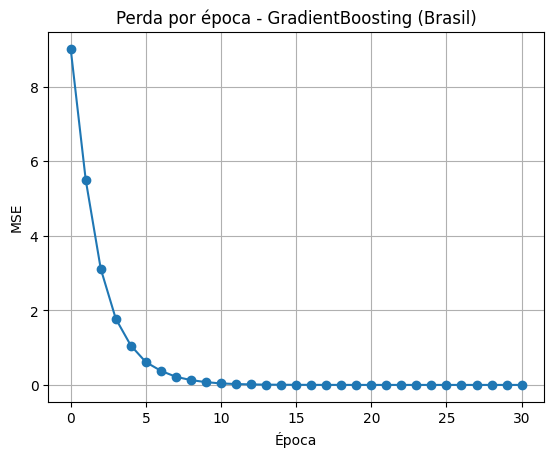

📊 MSE: 0.0001 | MAE: 0.0056
✅ Modelo final salvo como: Brasil_GradientBoosting_final.pkl

--- XGBoost ---


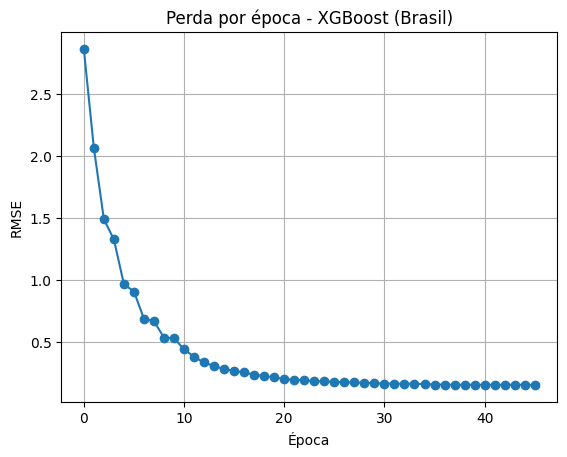

📊 MSE: 0.0231 | MAE: 0.1177
✅ Modelo final salvo como: Brasil_XGBoost_final.pkl

=== Treinando modelos FINAIS para INDIA ===
Length of ts: 2385
Length of ts_train: 1908
Length of ts_test: 477
Length of X_train.index: 1908
Length of X_test.index: 477
First 5 ts_train indices: DatetimeIndex(['2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14'],
              dtype='datetime64[ns]', name='Date', freq=None)
First 5 X_train indices: DatetimeIndex(['1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008'],
              dtype='datetime64[ns]', freq=None)
First 5 ts_test indices: DatetimeIndex(['2023-08-09', '2023-08-10', '2023-08-11', '2023-08-14',
               '2023-08-15'],
              dtype='datetime64[ns]', name='Date', freq=None)
First 5 X_test indices: DatetimeIndex(['1970-01-01 00:00:0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p


--- RandomForest ---
Random Forest não possui perda por época para exibir.
📊 MSE: 38.0203 | MAE: 5.0758
✅ Modelo final salvo como: India_RandomForest_final.pkl

--- GradientBoosting ---


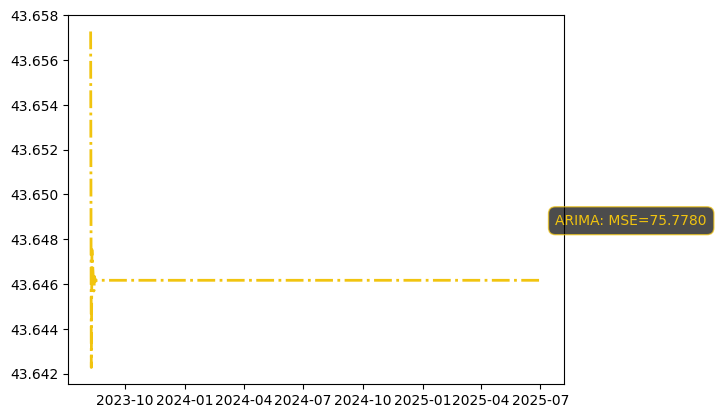

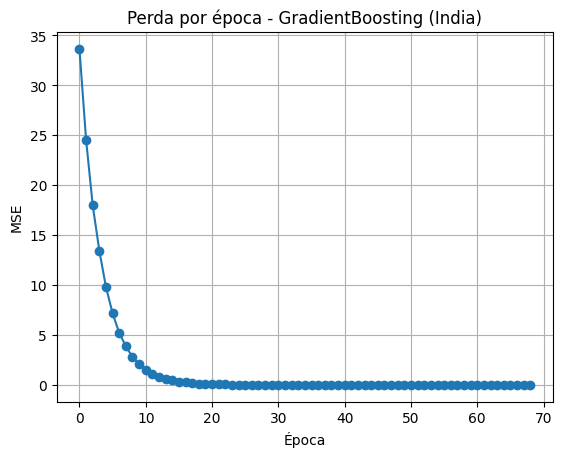

📊 MSE: 25.9915 | MAE: 4.0473
✅ Modelo final salvo como: India_GradientBoosting_final.pkl

--- XGBoost ---


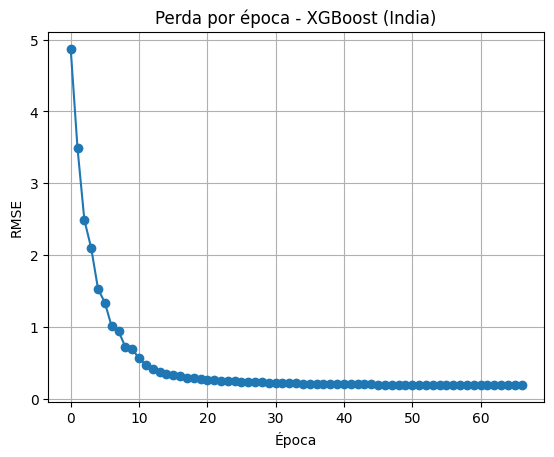

📊 MSE: 31.6955 | MAE: 4.6092
✅ Modelo final salvo como: India_XGBoost_final.pkl

=== Treinando modelos FINAIS para CHINA ===

--- RandomForest ---
Random Forest não possui perda por época para exibir.
📊 MSE: 0.1888 | MAE: 0.2891
✅ Modelo final salvo como: China_RandomForest_final.pkl

--- GradientBoosting ---


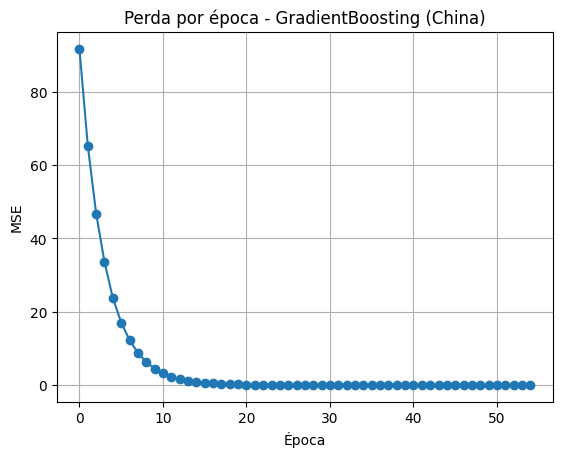

📊 MSE: 0.0003 | MAE: 0.0127
✅ Modelo final salvo como: China_GradientBoosting_final.pkl

--- XGBoost ---


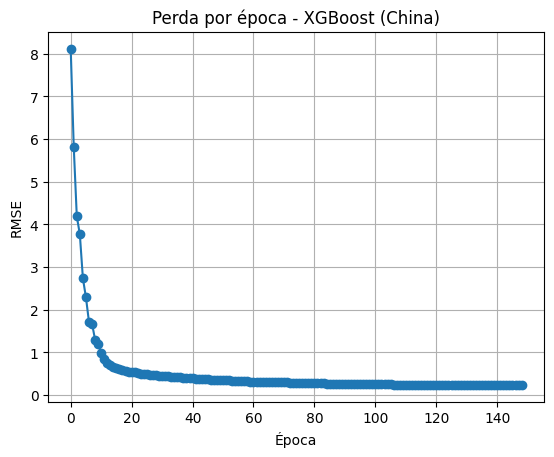

📊 MSE: 0.3029 | MAE: 0.4279
✅ Modelo final salvo como: China_XGBoost_final.pkl

=== Treinando modelos FINAIS para AFRICA_DO_SUL ===

--- RandomForest ---
Random Forest não possui perda por época para exibir.
📊 MSE: 0.9743 | MAE: 0.3606
✅ Modelo final salvo como: Africa_do_Sul_RandomForest_final.pkl

--- GradientBoosting ---


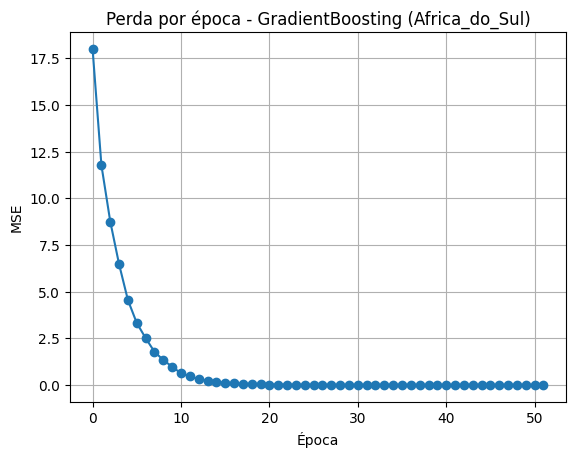

📊 MSE: 0.1140 | MAE: 0.0763
✅ Modelo final salvo como: Africa_do_Sul_GradientBoosting_final.pkl

--- XGBoost ---


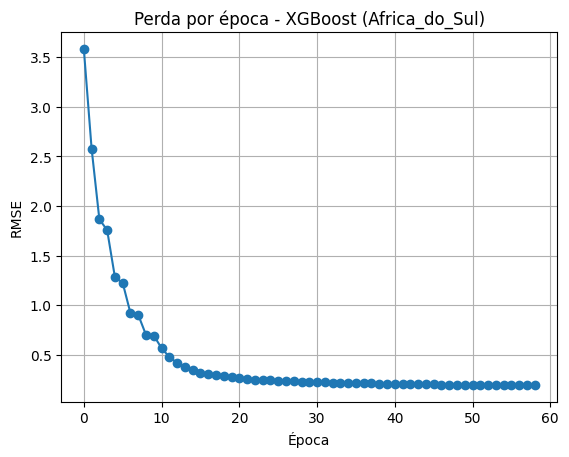

📊 MSE: 0.2722 | MAE: 0.2579
✅ Modelo final salvo como: Africa_do_Sul_XGBoost_final.pkl


In [32]:
import matplotlib.pyplot as plt
import joblib

final_models = {}

for country in dataframes.keys():
    print(f"\n\033[1m=== Treinando modelos FINAIS para {country.upper()} ===\033[0m")
    X_train, X_test, y_train, y_test = train_test_sets[country]

    # Ensure X_train, X_test, y_train, y_test have datetime indices
    if not isinstance(X_train.index, pd.DatetimeIndex):
        X_train.index = pd.to_datetime(X_train.index)
    if not isinstance(X_test.index, pd.DatetimeIndex):
        X_test.index = pd.to_datetime(X_test.index)
    if not isinstance(y_train.index, pd.DatetimeIndex):
        y_train.index = pd.to_datetime(y_train.index)
    if not isinstance(y_test.index, pd.DatetimeIndex):
        y_test.index = pd.to_datetime(y_test.index)


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # === Adiciona ARIMA para Índia ===
    if country == 'India':
        from statsmodels.tsa.arima.model import ARIMA

        df_india = dataframes['India'].copy()
        # Ensure the index of df_india is datetime
        if not isinstance(df_india.index, pd.DatetimeIndex):
            df_india.index = pd.to_datetime(df_india.index)

        # Use the correct column name 'MSCI INDIA' and drop NaNs
        ts = df_india['MSCI INDIA'].dropna()

        # Split the time series data directly based on the train/test ratio
        train_size_ts = int(len(ts) * (1 - TEST_SIZE))
        ts_train = ts.iloc[:train_size_ts]
        ts_test = ts.iloc[train_size_ts:]
        dates_test = ts_test.index


        print(f"Length of ts: {len(ts)}")
        print(f"Length of ts_train: {len(ts_train)}")
        print(f"Length of ts_test: {len(ts_test)}")
        print(f"Length of X_train.index: {len(X_train.index)}")
        print(f"Length of X_test.index: {len(X_test.index)}")
        print(f"First 5 ts_train indices: {ts_train.index[:5]}")
        print(f"First 5 X_train indices: {X_train.index[:5]}")
        print(f"First 5 ts_test indices: {ts_test.index[:5]}")
        print(f"First 5 X_test indices: {X_test.index[:5]}")


        # Ajusta modelo ARIMA com ordem (1,1,1) — pode ser alterada
        arima_model = ARIMA(ts_train, order=(1, 1, 1))
        # Check if ts_train is empty before fitting
        if not ts_train.empty:
            arima_fit = arima_model.fit()

            # Faz previsões para o same period as the test set
            arima_pred = arima_fit.forecast(steps=len(ts_test))
            arima_std = np.std(arima_pred - ts_test)
            arima_lower = arima_pred - 1.96 * arima_std
            arima_upper = arima_pred + 1.96 * arima_std

            # Plot da linha ARIMA
            plt.plot(dates_test, arima_pred,
                     label='ARIMA (Predito)',
                     color='#F1C40F',
                     linewidth=2,
                     linestyle='-.')

            # Intervalo de confiança do ARIMA
            plt.fill_between(dates_test, arima_lower, arima_upper,
                             color='#F1C40F',
                             alpha=0.15)

            # MSE ARIMA
            mse_arima = mean_squared_error(ts_test, arima_pred)
            # Access the last date using standard integer indexing
            plt.annotate(f'ARIMA: MSE={mse_arima:.4f}',
                         xy=(dates_test[-1], arima_pred.iloc[-1]),
                         xytext=(10, 40),
                         textcoords='offset points',
                         color='#F1C40F',
                         bbox=dict(boxstyle='round,pad=0.5',
                                   fc='black',
                                   ec='#F1C40F',
                                   alpha=0.7))
        else:
             print("ARIMA model not fitted for India as the training data is empty after index intersection.")


    for model_name in models.keys():
        print(f"\n--- {model_name} ---")
        best_params = search_results[(country, model_name)]

        if model_name == 'GradientBoosting':
            model = GradientBoostingRegressor(
                **best_params,
                random_state=666,
                validation_fraction=0.1,
                n_iter_no_change=10,
                tol=1e-4
            )
            model.fit(X_train_scaled, y_train)

            # Plot da perda por época (loss curve)
            if hasattr(model, 'train_score_'):
                plt.figure()
                plt.plot(model.train_score_, marker='o')
                plt.title(f'Perda por época - {model_name} ({country})')
                plt.xlabel('Época')
                plt.ylabel('MSE')
                plt.grid(True)
                plt.show()

        elif model_name == 'XGBoost':
            model = XGBRegressor(
                **best_params,
                random_state=666,
                early_stopping_rounds=10,
                eval_metric='rmse'
            )

            model.fit(
                X_train_scaled, y_train,
                eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)],
                verbose=False
            )

            # Obter os resultados após o fit
            evals_result = model.evals_result()

            # Plot da perda por época
            if 'validation_0' in evals_result:
                rmse_values = evals_result['validation_0']['rmse']
                plt.figure()
                plt.plot(rmse_values, marker='o')
                plt.title(f'Perda por época - {model_name} ({country})')
                plt.xlabel('Época')
                plt.ylabel('RMSE')
                plt.grid(True)
                plt.show()

        elif model_name == 'RandomForest':
            model = RandomForestRegressor(
                **best_params,
                random_state=666
            )
            model.fit(X_train_scaled, y_train)
            print("Random Forest não possui perda por época para exibir.")

        # Pipeline final
        pipeline = Pipeline([
            ('scaler', scaler),
            ('model', model)
        ])

        final_models[f"{country}_{model_name}"] = pipeline

        # Avaliação
        y_pred = pipeline.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"📊 MSE: {mse:.4f} | MAE: {mae:.4f}")

        # Salvamento
        filename = f"{country}_{model_name}_final.pkl"
        joblib.dump(pipeline, filename)
        print(f"✅ Modelo final salvo como: {filename}")

Perda/Época de cada modelo

In [33]:
import seaborn as sns
#vamos importar o R2 met
from sklearn.metrics import r2_score

# Seção 3: Forecasting por país do BRICS


=== PREVISÕES PARA BRASIL ===


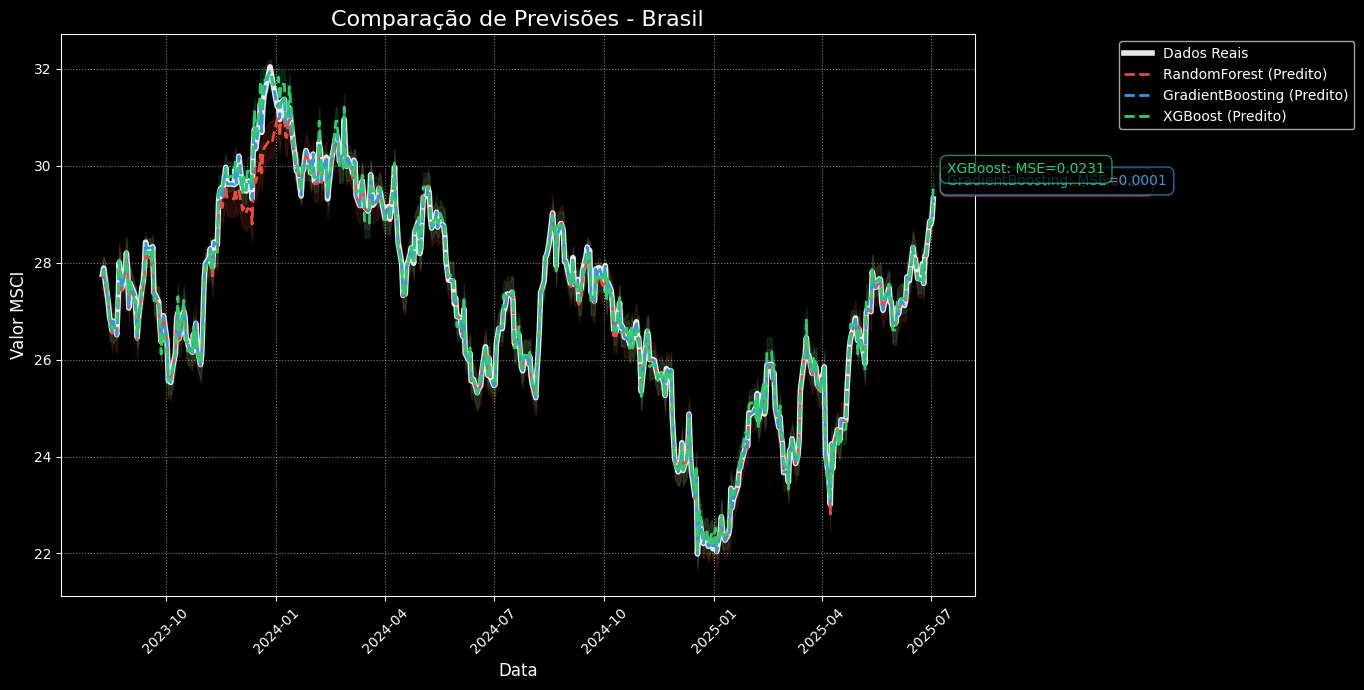


=== PREVISÕES PARA INDIA ===


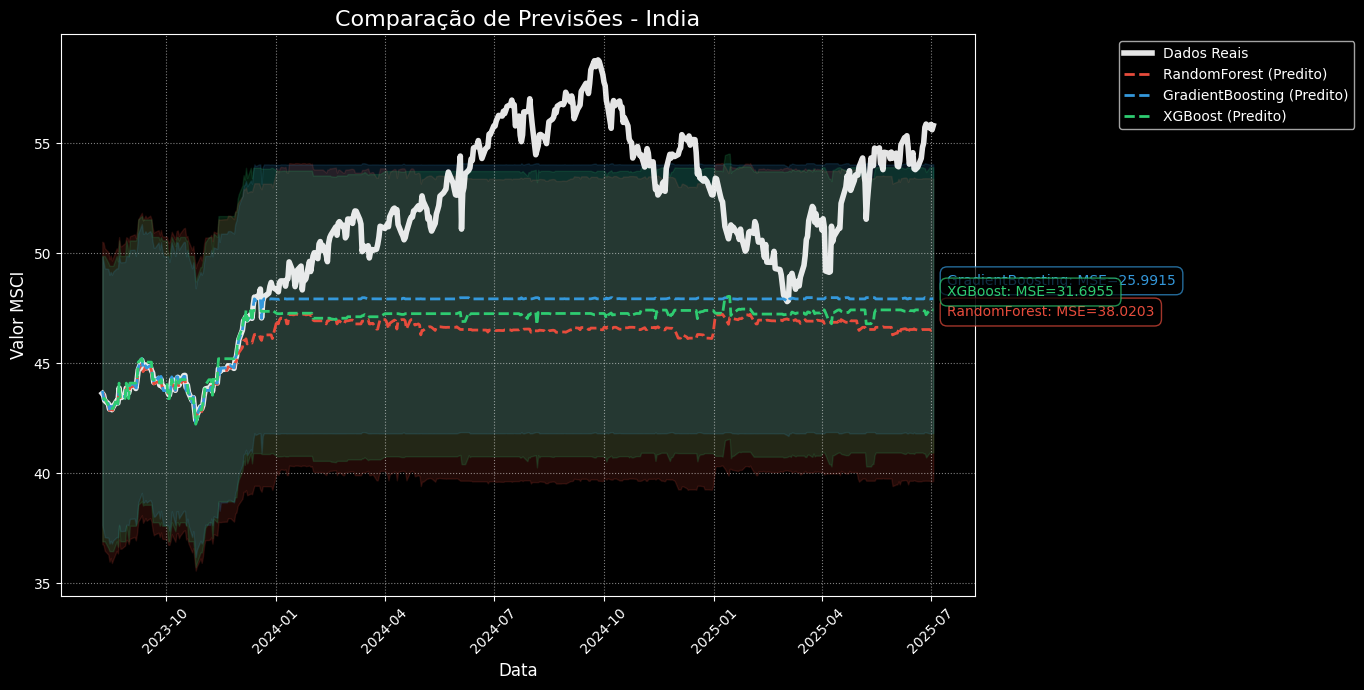


=== PREVISÕES PARA CHINA ===


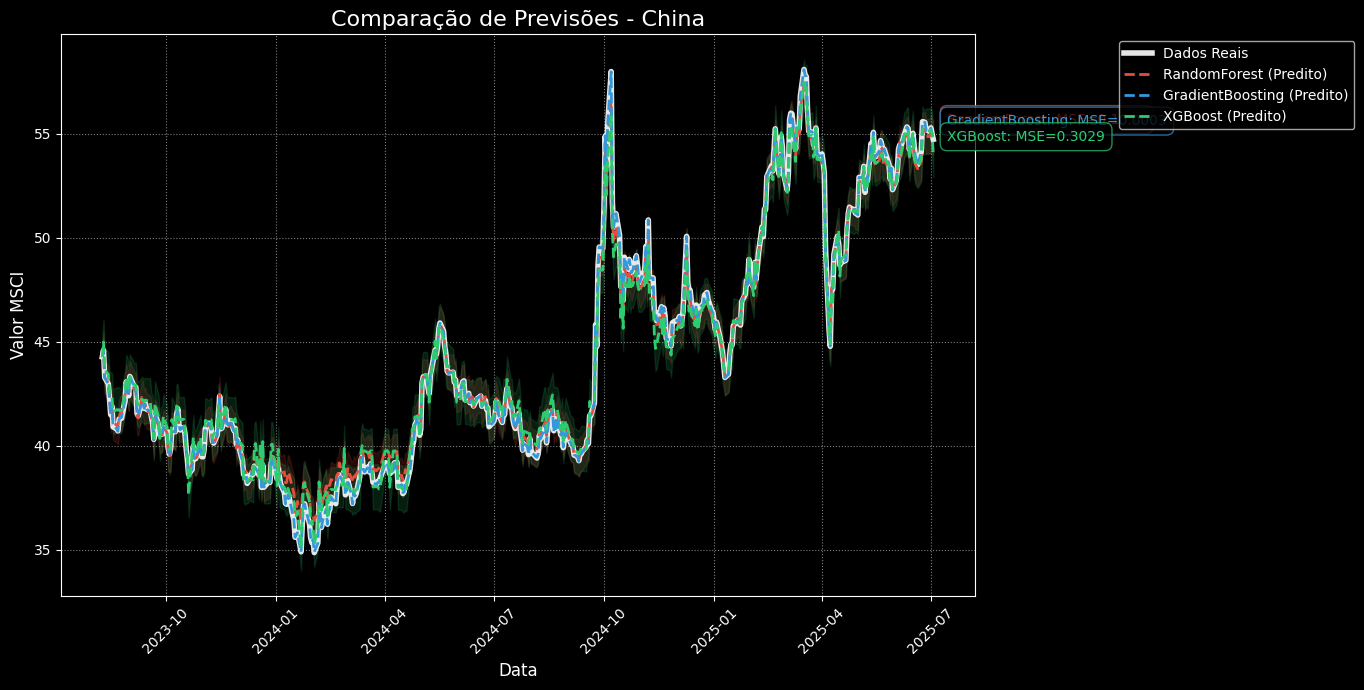


=== PREVISÕES PARA AFRICA_DO_SUL ===


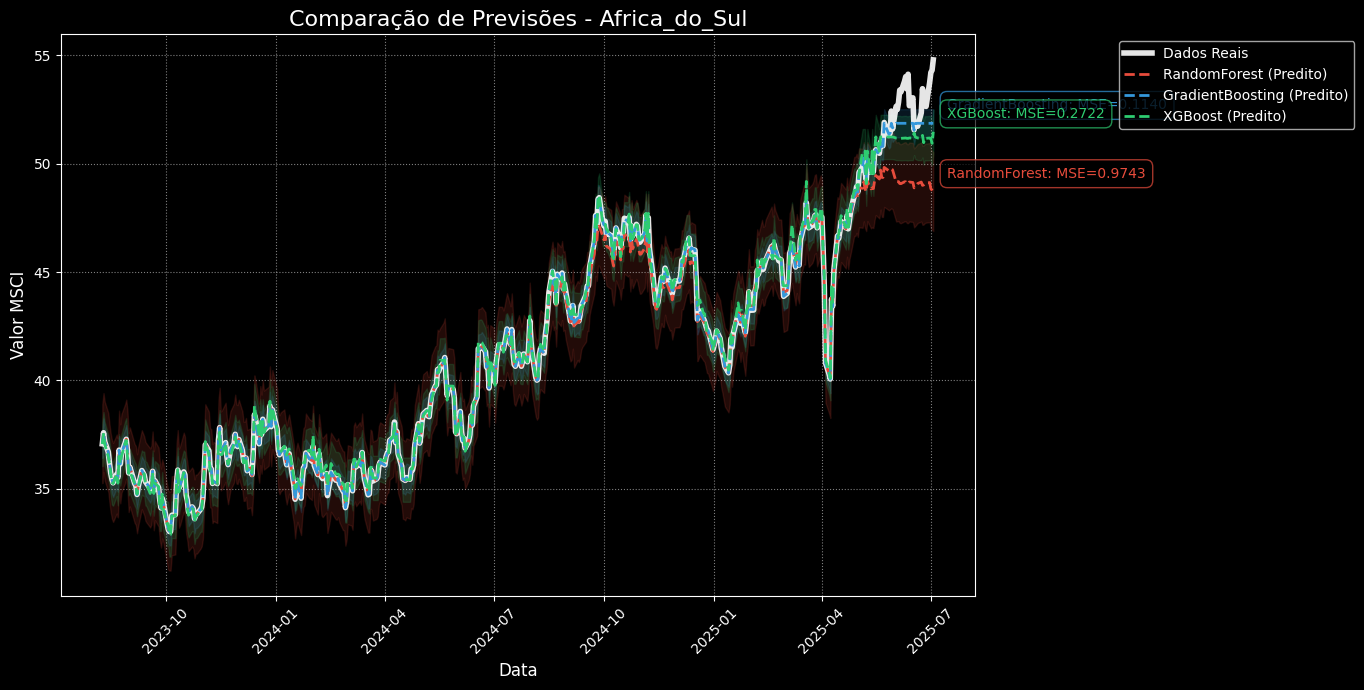

In [34]:
import os

plt.style.use('dark_background')

for country in dataframes.keys():
    print(f"\n\033[1m=== PREVISÕES PARA {country.upper()} ===\033[0m")
    X_train, X_test, y_train, y_test = train_test_sets[country]
    dates_test = dataframes[country].index[-len(y_test):]

    model_colors = {
        'RandomForest': '#E74C3C',
        'GradientBoosting': '#3498DB',
        'XGBoost': '#2ECC71'
    }

    plt.figure(figsize=(14, 7))

    # Plot dos dados reais
    plt.plot(dates_test, y_test,
             label='Dados Reais',
             color='white',
             linewidth=4,
             alpha=0.9)

    for model_name in models.keys():
        # Carrega o modelo salvo
        filename = f"{country}_{model_name}_final.pkl"
        if not os.path.exists(filename):
            print(f"⚠️ Modelo {filename} não encontrado.")
            continue

        model = joblib.load(filename)
        y_pred = model.predict(X_test)

        # Intervalos de confiança
        std = np.std(y_pred - y_test)
        lower = y_pred - 1.96 * std
        upper = y_pred + 1.96 * std

        # Plot da predição
        plt.plot(dates_test, y_pred,
                 label=f'{model_name} (Predito)',
                 color=model_colors[model_name],
                 linewidth=2,
                 linestyle='--')


        plt.fill_between(dates_test, lower, upper,
                         color=model_colors[model_name],
                         alpha=0.15)

    plt.title(f'Comparação de Previsões - {country}', fontsize=16)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Valor MSCI', fontsize=12)
    plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left')
    plt.grid(True, linestyle=':', alpha=0.5)
    plt.xticks(rotation=45)


    for model_name in models.keys():
        filename = f"{country}_{model_name}_final.pkl"
        if not os.path.exists(filename):
            continue
        model = joblib.load(filename)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        plt.annotate(f'{model_name}: MSE={mse:.4f}',
                     xy=(dates_test[-1], y_pred[-1]),
                     xytext=(10, 10),
                     textcoords='offset points',
                     color=model_colors[model_name],
                     bbox=dict(boxstyle='round,pad=0.5',
                               fc='black',
                               ec=model_colors[model_name],
                               alpha=0.7))

    plt.tight_layout()
    plt.show()


# Seção 5: Visão agregada para o Bloco BRICS

Decomposição das colunas alvo e agregação a partir da média


=== DECOMPOSIÇÃO TEMPORAL DA MÉDIA BRICS ===


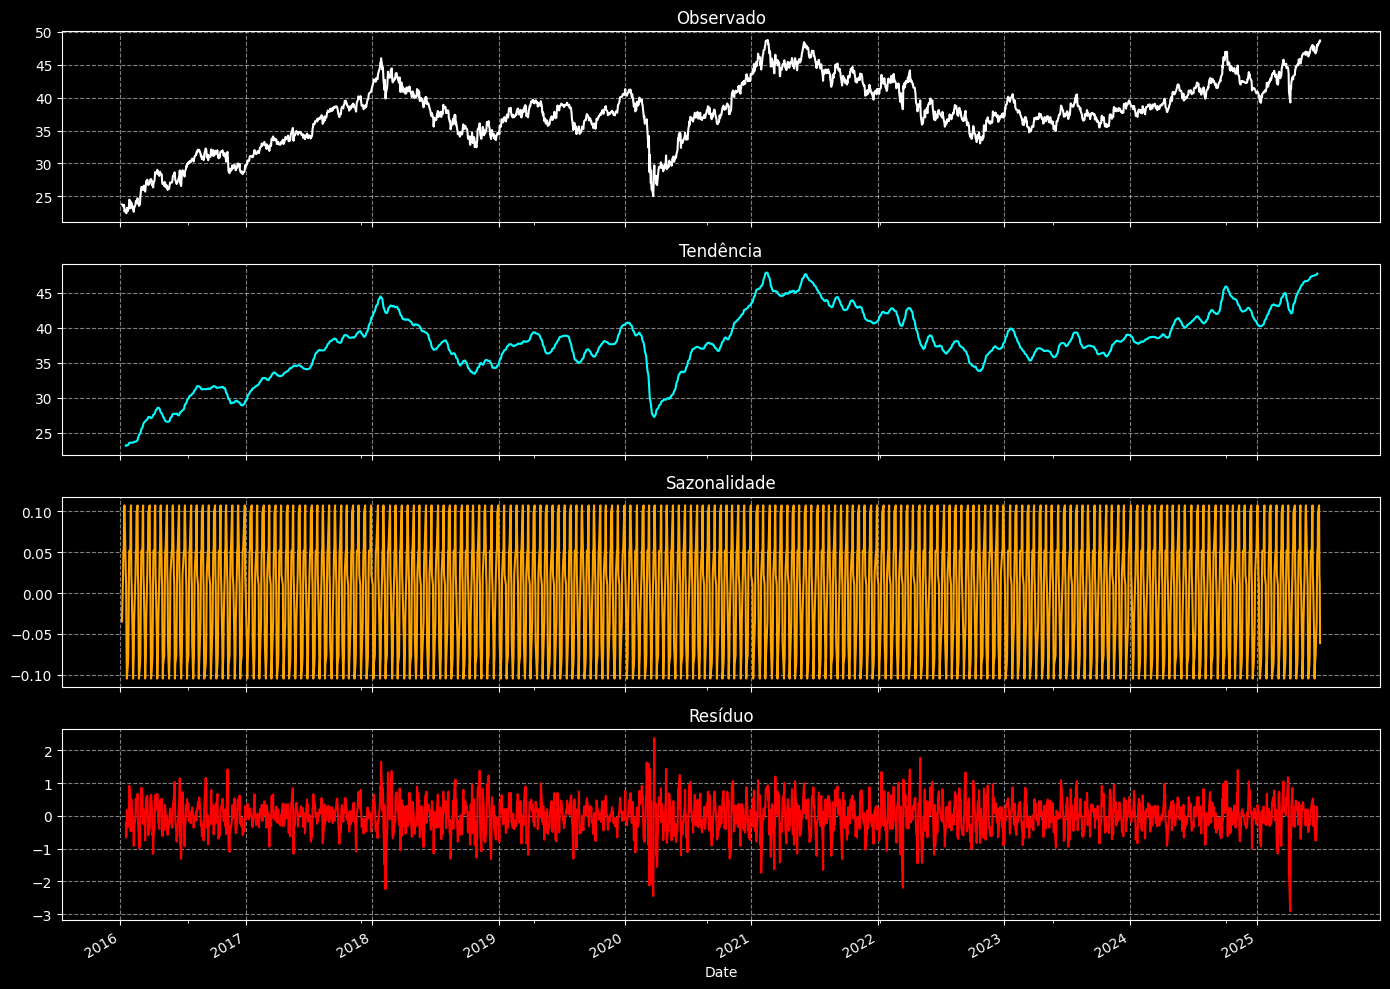

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

plt.style.use('dark_background')

msci_series = []

for country, df in dataframes.items():
    # Busca a primeira coluna que contenha 'MSCI'
    msci_cols = [col for col in df.columns if 'MSCI' in col.upper()]

    if msci_cols:
        series = df[msci_cols[0]]
        msci_series.append(series)
    else:
        print(f"Atenção: Nenhuma coluna MSCI encontrada em df_{country}")



# Concatena e faz a média
brics_mean_series = pd.concat(msci_series, axis=1).mean(axis=1)



# Decomposição
print("\n\033[1m=== DECOMPOSIÇÃO TEMPORAL DA MÉDIA BRICS ===\033[0m")
decomposition = seasonal_decompose(brics_mean_series, model='additive', period=12)

# Plot
fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

decomposition.observed.plot(ax=axs[0], title='Observado', color='white')
decomposition.trend.plot(ax=axs[1], title='Tendência', color='cyan')
decomposition.seasonal.plot(ax=axs[2], title='Sazonalidade', color='orange')
decomposition.resid.plot(ax=axs[3], title='Resíduo', color='red')

for ax in axs:
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**Forecasting para o bloco com agregação a partir da média**

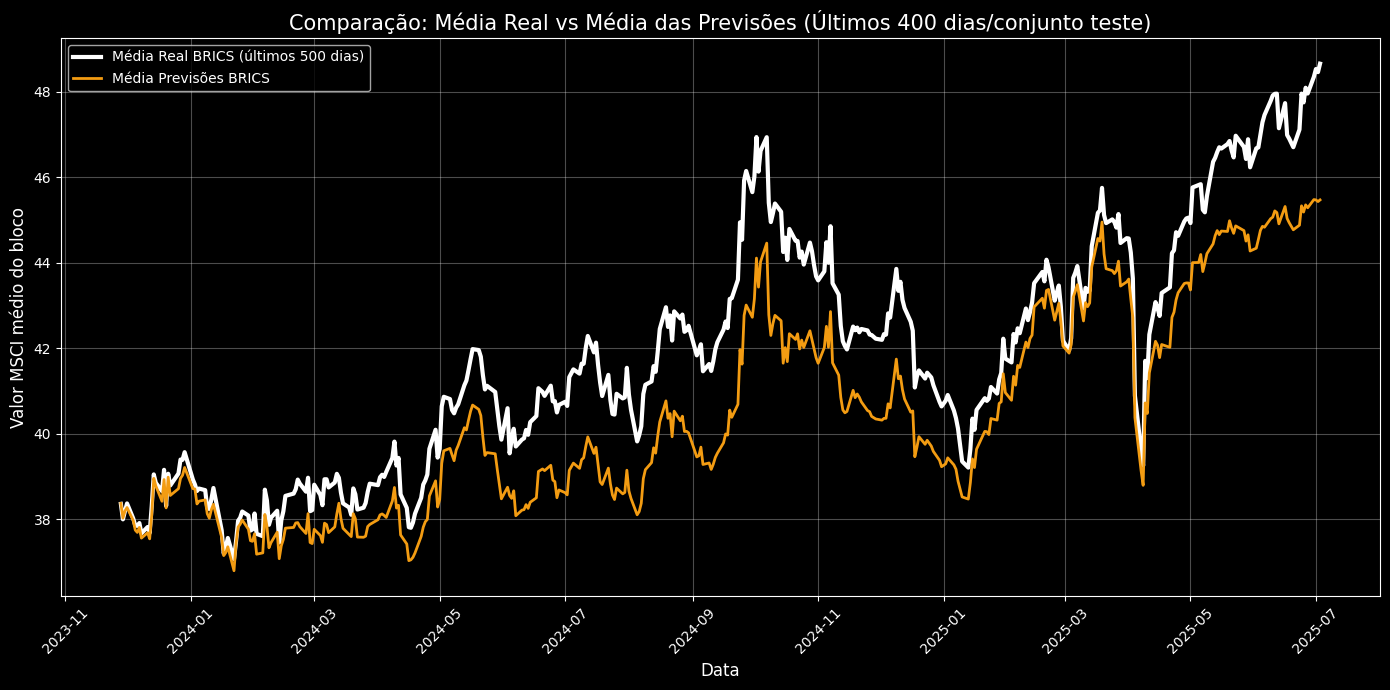

In [36]:

plt.style.use('dark_background')

def prepare_features(df, model):
    msci_col = [col for col in df.columns if 'msci' in col.lower()][0]

    if hasattr(model.named_steps['model'], 'feature_names_in_'):
        expected_features = model.named_steps['model'].feature_names_in_
    else:
        expected_features = df.drop(columns=[msci_col]).columns

    if 'Date' in expected_features:
        expected_features = [f for f in expected_features if f != 'Date']

    return msci_col, df[expected_features]

# Previsões
pred_data = []

for country, df in dataframes.items():
    country_preds = []

    for model_name in models.keys():
        model_path = f"{country}_{model_name}_final.pkl"
        model = joblib.load(model_path)

        msci_col, X = prepare_features(df, model)
        y_pred = model.predict(X)
        country_preds.append(y_pred)

    country_mean_pred = np.mean(country_preds, axis=0)
    pred_data.append(country_mean_pred)

# Média das previsões
brics_pred_series = pd.Series(
    np.mean(pred_data, axis=0),
    index=brics_mean_series.index
)

# Cortar os últimos 400 dias pois é onde está o conjunto de teste para comparar com a média das previsões
real_tail = brics_mean_series.iloc[-400:]
pred_tail = brics_pred_series.iloc[-400:]

# Plot
plt.figure(figsize=(14, 7))
plt.plot(real_tail.index, real_tail,
         label='Média Real BRICS (últimos 500 dias)',
         color='white',
         linewidth=3)

plt.plot(pred_tail.index, pred_tail,
         label='Média Previsões BRICS',
         color='#F39C12',
         linewidth=2)

plt.title('Comparação: Média Real vs Média das Previsões (Últimos 400 dias/conjunto teste)', fontsize=15)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor MSCI médio do bloco', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Extra: Fatores explanatórios para o preços de ETF's por país de acordo com o modelo Random Forest

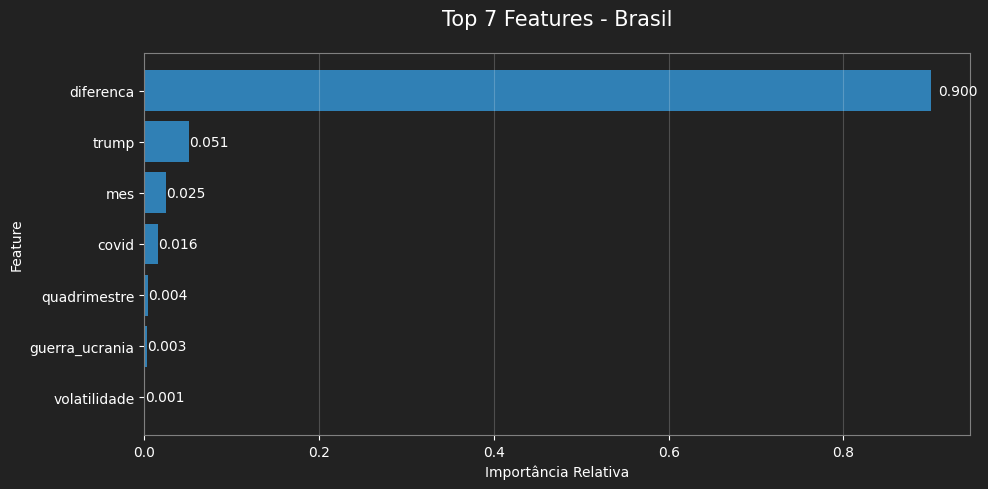


Brasil - Importância das Features:
| Feature        |   Importance |
|:---------------|-------------:|
| diferenca      |       0.8998 |
| trump          |       0.0512 |
| mes            |       0.0246 |
| covid          |       0.0157 |
| quadrimestre   |       0.0042 |
| guerra_ucrania |       0.0029 |
| volatilidade   |       0.0010 |


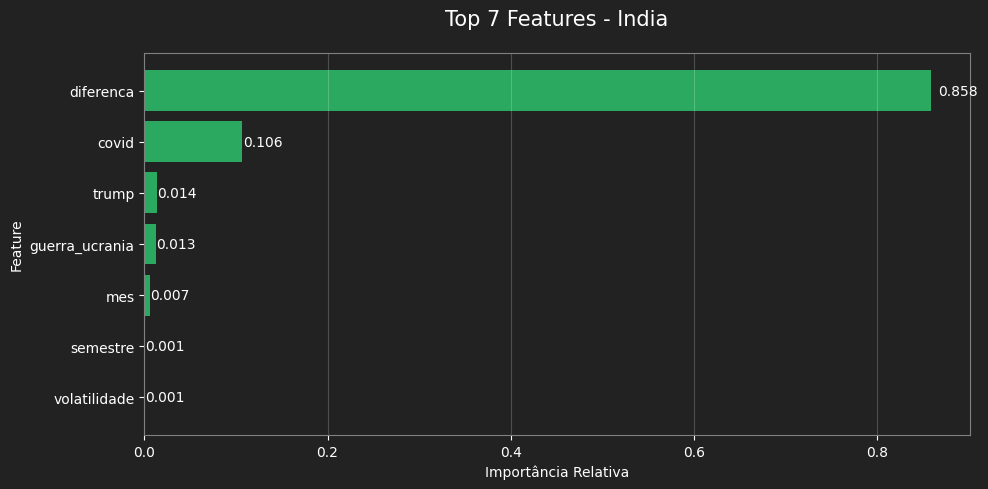


India - Importância das Features:
| Feature        |   Importance |
|:---------------|-------------:|
| diferenca      |       0.8581 |
| covid          |       0.1065 |
| trump          |       0.0139 |
| guerra_ucrania |       0.0132 |
| mes            |       0.0065 |
| semestre       |       0.0009 |
| volatilidade   |       0.0005 |


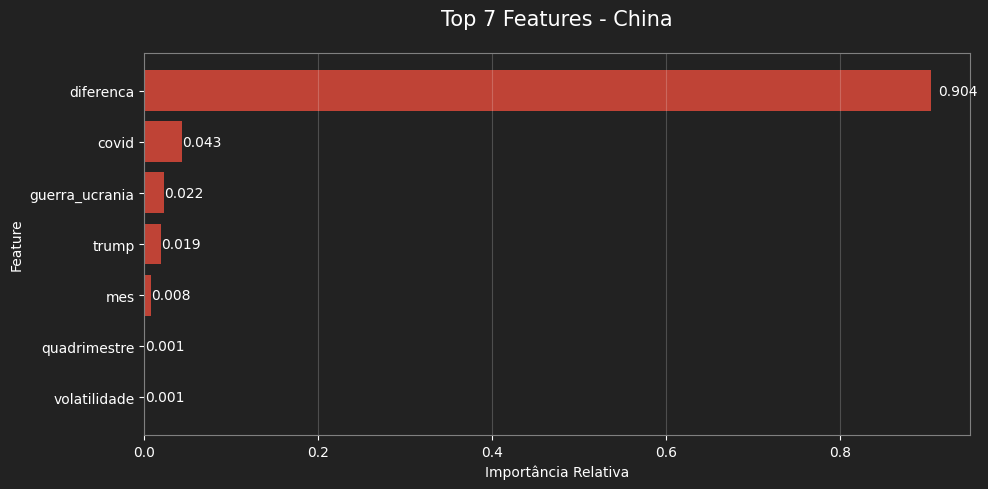


China - Importância das Features:
| Feature        |   Importance |
|:---------------|-------------:|
| diferenca      |       0.9042 |
| covid          |       0.0430 |
| guerra_ucrania |       0.0221 |
| trump          |       0.0187 |
| mes            |       0.0081 |
| quadrimestre   |       0.0013 |
| volatilidade   |       0.0013 |


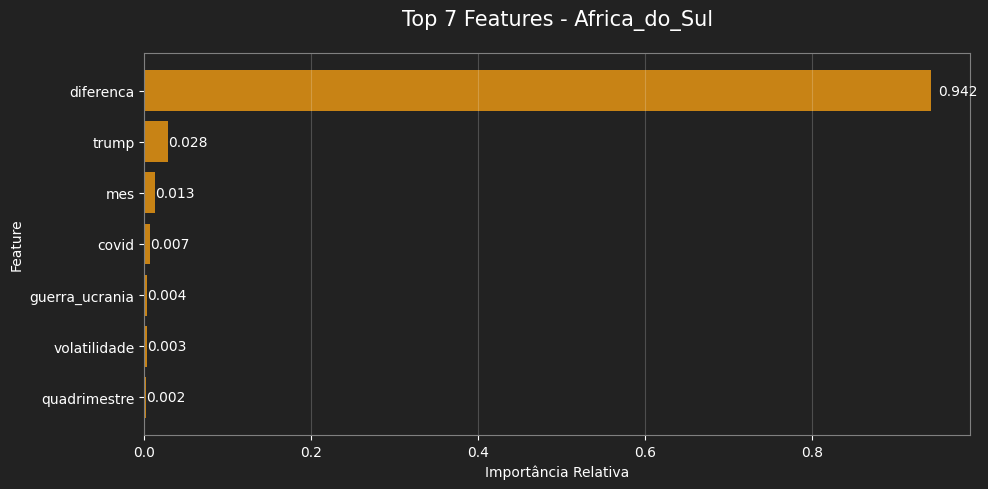


Africa_do_Sul - Importância das Features:
| Feature        |   Importance |
|:---------------|-------------:|
| diferenca      |       0.9425 |
| trump          |       0.0279 |
| mes            |       0.0132 |
| covid          |       0.0066 |
| guerra_ucrania |       0.0036 |
| volatilidade   |       0.0029 |
| quadrimestre   |       0.0022 |


In [37]:
plt.style.use('dark_background')

N_FEATURES = 7
colors = ['#3498DB', '#2ECC71', '#E74C3C', '#F39C12']  # Cores para os países

for i, country in enumerate(dataframes.keys()):
    try:

        model = joblib.load(f'{country}_RandomForest_final.pkl')


        if hasattr(model.named_steps['model'], 'feature_importances_'):
            importances = model.named_steps['model'].feature_importances_


            if hasattr(model.named_steps['scaler'], 'feature_names_in_'):
                feature_names = model.named_steps['scaler'].feature_names_in_
            else:
                feature_names = [f"Feature_{i}" for i in range(len(importances))]

            # Monta o DataFrame com as importâncias
            feat_imp = (
                pd.DataFrame({
                    'Feature': feature_names,
                    'Importance': importances
                })
                .sort_values(by='Importance', ascending=False)
                .head(N_FEATURES)
            )


            plt.figure(figsize=(10, 5), facecolor='#222222')
            bars = plt.barh(feat_imp['Feature'], feat_imp['Importance'],
                            color=colors[i % len(colors)], alpha=0.8)

            for bar in bars:
                width = bar.get_width()
                plt.text(width * 1.01, bar.get_y() + bar.get_height() / 2,
                         f'{width:.3f}',
                         va='center', ha='left', color='white', fontsize=10)

            plt.title(f'Top {N_FEATURES} Features - {country}',
                      color='white', pad=20, fontsize=15)
            plt.xlabel('Importância Relativa', color='white')
            plt.ylabel('Feature', color='white')
            plt.gca().invert_yaxis()

            # Estética escura em homenagem ao Ozzy Osbourne RIP
            ax = plt.gca()
            ax.set_facecolor('#222222')
            ax.tick_params(colors='white')
            for spine in ax.spines.values():
                spine.set_edgecolor('gray')
            plt.grid(True, alpha=0.2, axis='x')
            plt.tight_layout()
            plt.show()


            print(f"\n\033[1m{country} - Importância das Features:\033[0m")
            print(feat_imp.to_markdown(floatfmt=".4f", index=False))
        else:
            print(f"\n⚠️ Modelo de {country} não possui `feature_importances_`.")
    except FileNotFoundError:
        print("There are dragons if u keep going down this path...")